# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [61]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [62]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jumla
Processing Record 2 of Set 1 | dunedin
Processing Record 3 of Set 1 | port-vila
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | keflavik
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | natal
Processing Record 8 of Set 1 | nacala
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | la passe
Processing Record 13 of Set 1 | laojunmiao
Processing Record 14 of Set 1 | hirara
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | vernon
Processing Record 18 of Set 1 | makoua
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | saipan
Processing Record 21 of Set 1 | howard springs
Processing Record 22 of Set 1 | lihue
Processing Record 23 of Set 1 | olonkinbyen
Processing R

In [63]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [64]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jumla,29.2747,82.1838,287.84,49,0,0.67,NP,1684715427
1,dunedin,-45.8742,170.5036,285.19,54,36,0.95,NZ,1684715427
2,port-vila,-17.7338,168.3219,298.93,83,100,1.03,VU,1684715428
3,blackmans bay,-43.0167,147.3167,288.22,69,100,3.66,AU,1684715429
4,keflavik,64.0049,-22.5624,277.10,87,75,6.17,IS,1684715429


In [65]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [66]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jumla,29.2747,82.1838,287.84,49,0,0.67,NP,1684715427
1,dunedin,-45.8742,170.5036,285.19,54,36,0.95,NZ,1684715427
2,port-vila,-17.7338,168.3219,298.93,83,100,1.03,VU,1684715428
3,blackmans bay,-43.0167,147.3167,288.22,69,100,3.66,AU,1684715429
4,keflavik,64.0049,-22.5624,277.10,87,75,6.17,IS,1684715429


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

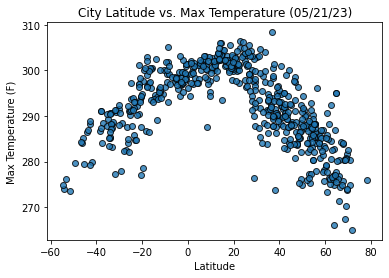

In [67]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
latitudes = city_data_df["Lat"]
temperatures = city_data_df["Max Temp"]

plt.scatter(latitudes, temperatures, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")

# Save the figure
output_dir = "path/to/directory"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, "Fig1.png"))

# Show plot
plt.show()

#### Latitude Vs. Humidity

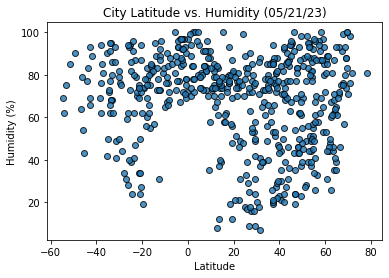

In [68]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
hummitidy = city_data_df["Humidity"]

plt.scatter(latitudes, hummitidy, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")  
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")

# Save the figure
output_dir = "path/to/directory"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, "Fig2.png"))

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

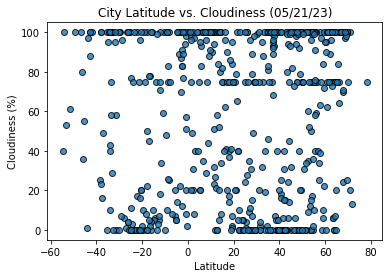

In [69]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
cloudiness = city_data_df["Cloudiness"]

plt.scatter(latitudes, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")  

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")

# Save the figure
output_dir = "path/to/directory"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, "Fig2.png"))

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

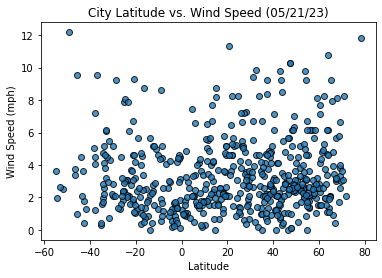

In [70]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
wind_speed = city_data_df["Wind Speed"]

plt.scatter(latitudes, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")

# Save the figure
output_dir = "path/to/directory"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, "Fig3.png"))

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_linear_regression_plot(x_data, y_data, title, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data)
    plt.plot(x_data, regress_values, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.show()

In [72]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jumla,29.2747,82.1838,287.84,49,0,0.67,NP,1684715427
4,keflavik,64.0049,-22.5624,277.10,87,75,6.17,IS,1684715429
5,tura,25.5198,90.2201,296.34,83,4,0.96,IN,1684715430
9,bethel,41.3712,-73.4140,291.62,76,0,0.00,US,1684715364
11,la passe,45.5549,-0.8967,288.70,95,82,2.87,FR,1684715432


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dunedin,-45.8742,170.5036,285.19,54,36,0.95,NZ,1684715427
2,port-vila,-17.7338,168.3219,298.93,83,100,1.03,VU,1684715428
3,blackmans bay,-43.0167,147.3167,288.22,69,100,3.66,AU,1684715429
6,natal,-5.7950,-35.2094,298.51,100,20,2.57,BR,1684715430
7,nacala,-14.5428,40.6728,294.59,95,6,1.84,MZ,1684715431


###  Temperature vs. Latitude Linear Regression Plot

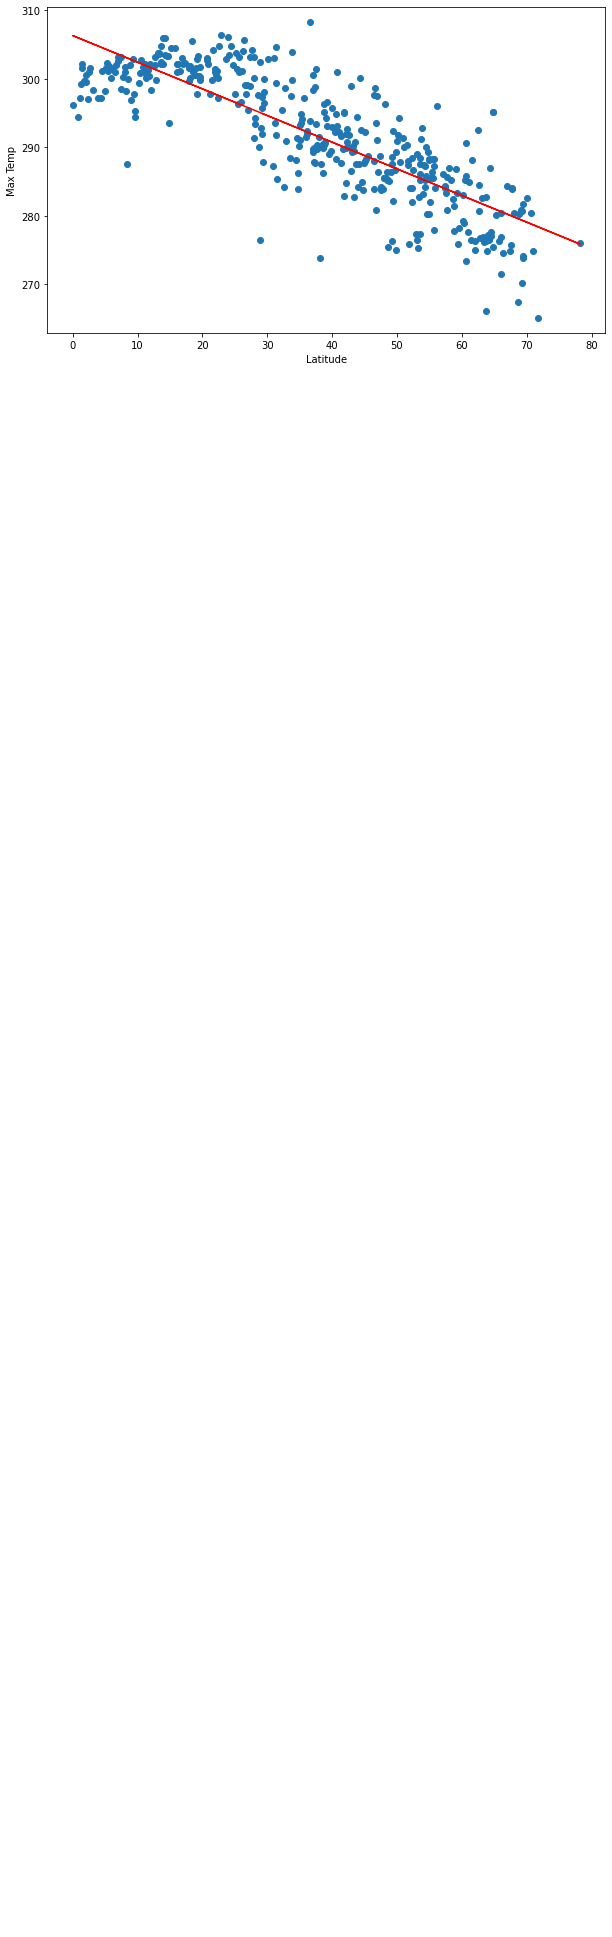

In [74]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (6, 30))


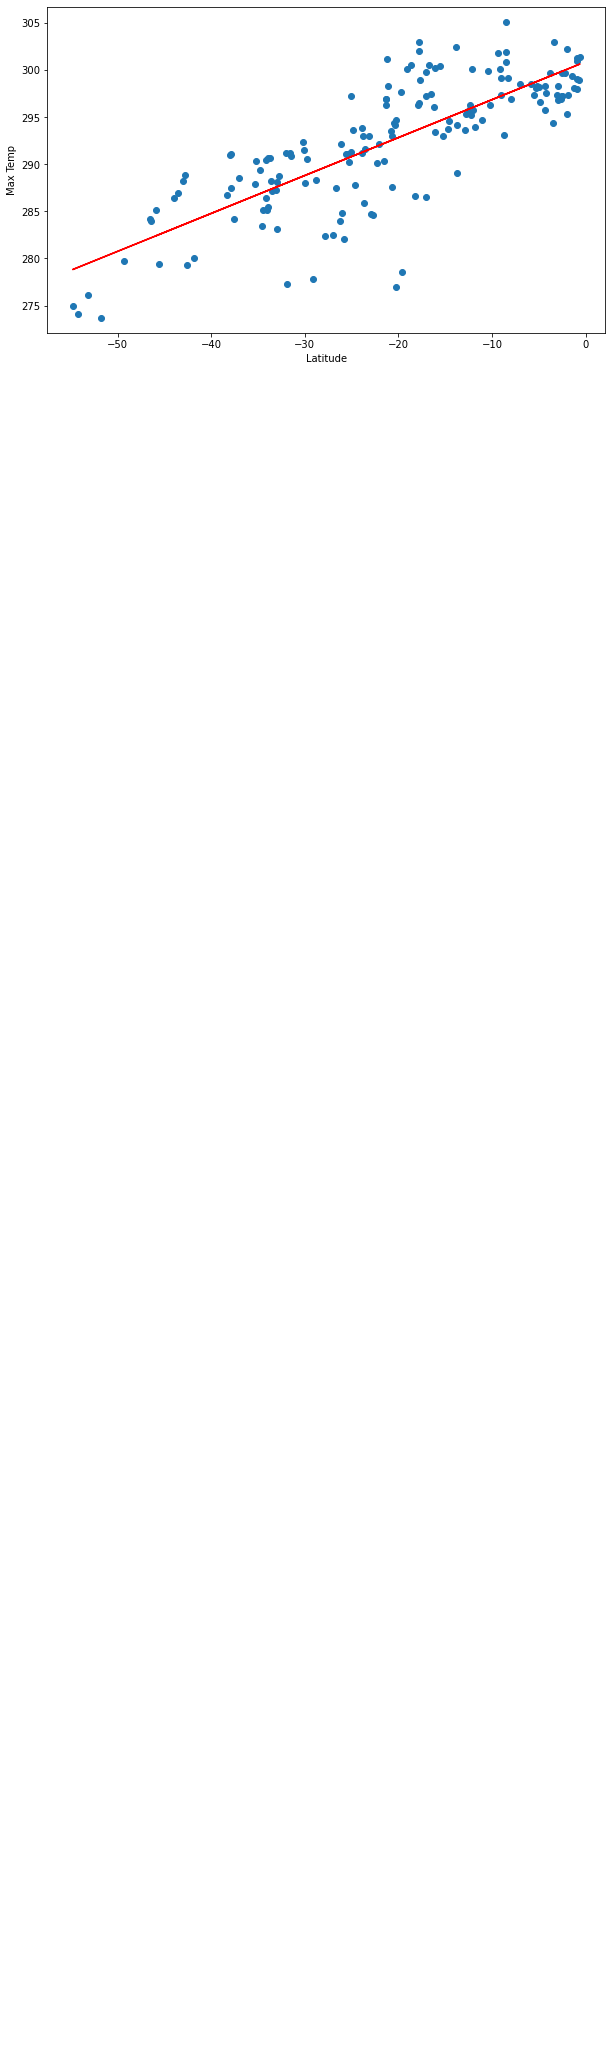

In [75]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-50, 90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

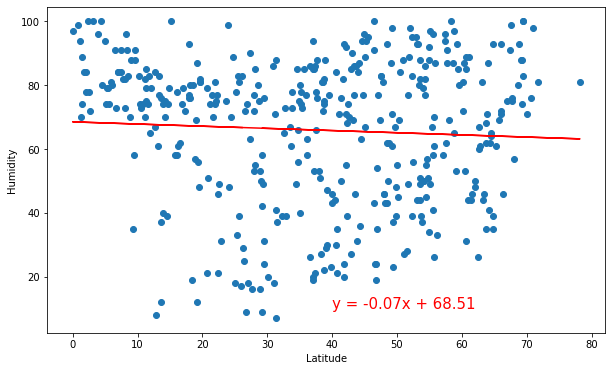

In [76]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (40, 10))


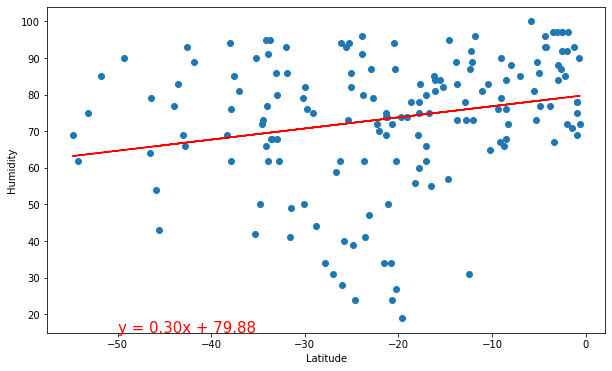

In [77]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-50, 15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

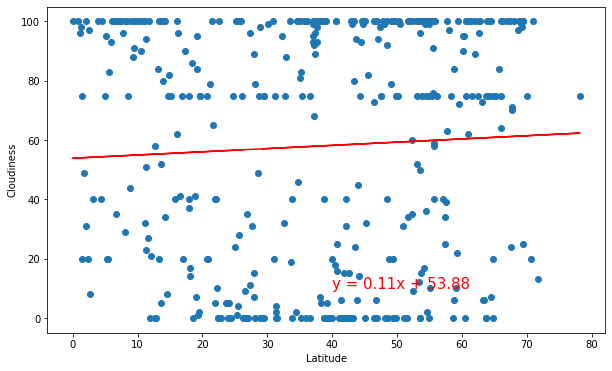

In [78]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (40, 10))

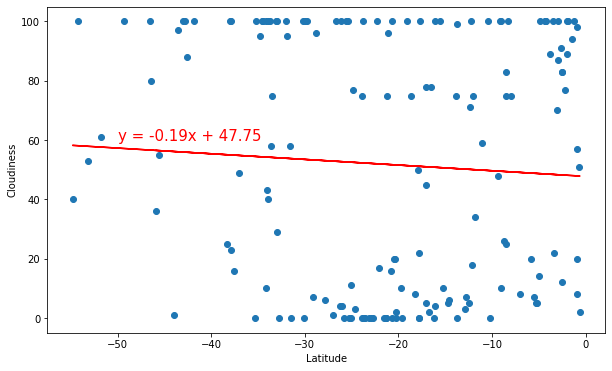

In [79]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-50, 60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

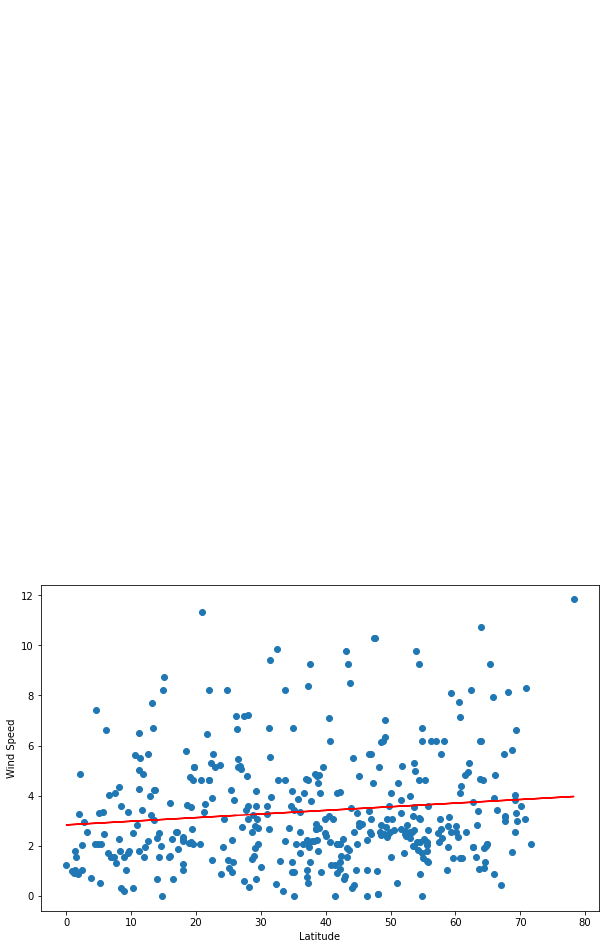

In [80]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (40, 35))

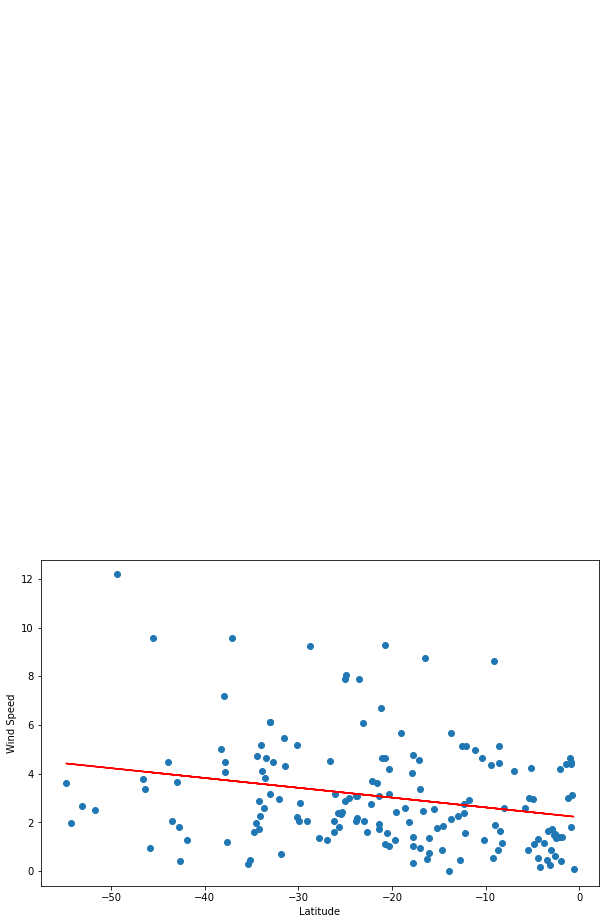

In [81]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-50, 35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE